In [3]:
# Importation des bibliothèques nécessaires
import pandas as pd  # Pour la manipulation des données tabulaires
import numpy as np  # Pour les calculs numériques si nécessaire

# Charger le fichier CSV dans un DataFrame
file_path = 'D://MSI-1//Machine Learning//HAM10000_metadata.csv'  # Remplacez par le chemin de votre fichier
df = pd.read_csv(file_path)

# Affichage des premières lignes pour un aperçu général
print("Aperçu des premières lignes du dataset :")
print(df.head())

Aperçu des premières lignes du dataset :
     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [4]:
# Dimensions du dataset (nombre de lignes et de colonnes)
print("\nDimensions du dataset (lignes, colonnes) :")
print(df.shape)


Dimensions du dataset (lignes, colonnes) :
(10015, 7)


In [5]:
# Informations générales sur le dataset (types de données, valeurs non nulles)
print("\nInformations sur le dataset :")
print(df.info())


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None


In [6]:
# Statistiques descriptives des colonnes numériques
print("\nStatistiques descriptives des colonnes numériques :")
print(df.describe())


Statistiques descriptives des colonnes numériques :
               age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000


In [8]:
# Affichage des colonnes avec des valeurs manquantes
missing_values = df.isnull().sum()
print("\nValeurs manquantes par colonne :")
print(missing_values[missing_values > 0])


Valeurs manquantes par colonne :
age    57
dtype: int64


In [13]:
# Imputation des valeurs manquantes par la médiane
df['age'] = df['age'].fillna(df['age'].median())

# Vérification après imputation
print("\nValeurs manquantes dans 'age' après imputation :")
print(df['age'].isnull().sum())


Valeurs manquantes dans 'age' après imputation :
0


In [14]:
# Afficher les statistiques après imputation
print("\nStatistiques de la colonne 'age' après imputation :")
print(df['age'].describe())


Statistiques de la colonne 'age' après imputation :
count    10015.000000
mean        51.853220
std         16.920833
min          0.000000
25%         40.000000
50%         50.000000
75%         65.000000
max         85.000000
Name: age, dtype: float64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Séparer les colonnes numériques et catégoriques
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns


print("\nColonnes numériques :", numerical_columns)
print("Colonnes catégoriques :", categorical_columns)


Colonnes numériques : Index(['age'], dtype='object')
Colonnes catégoriques : Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'sex', 'localization'], dtype='object')


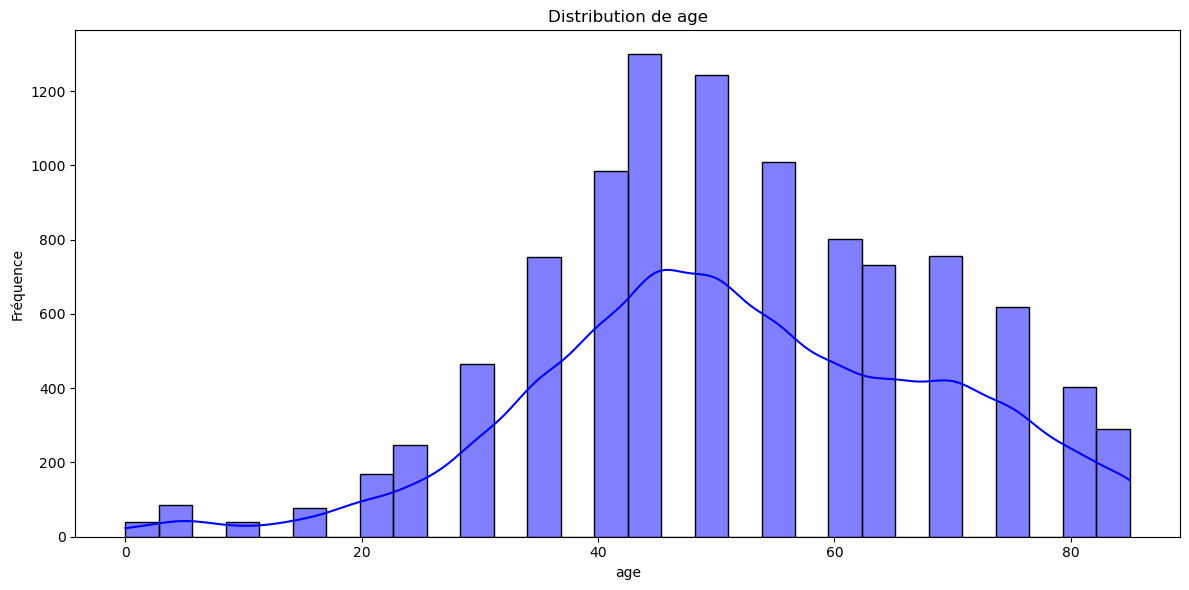

In [16]:
# 1. Visualisation des distributions des variables numériques
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()

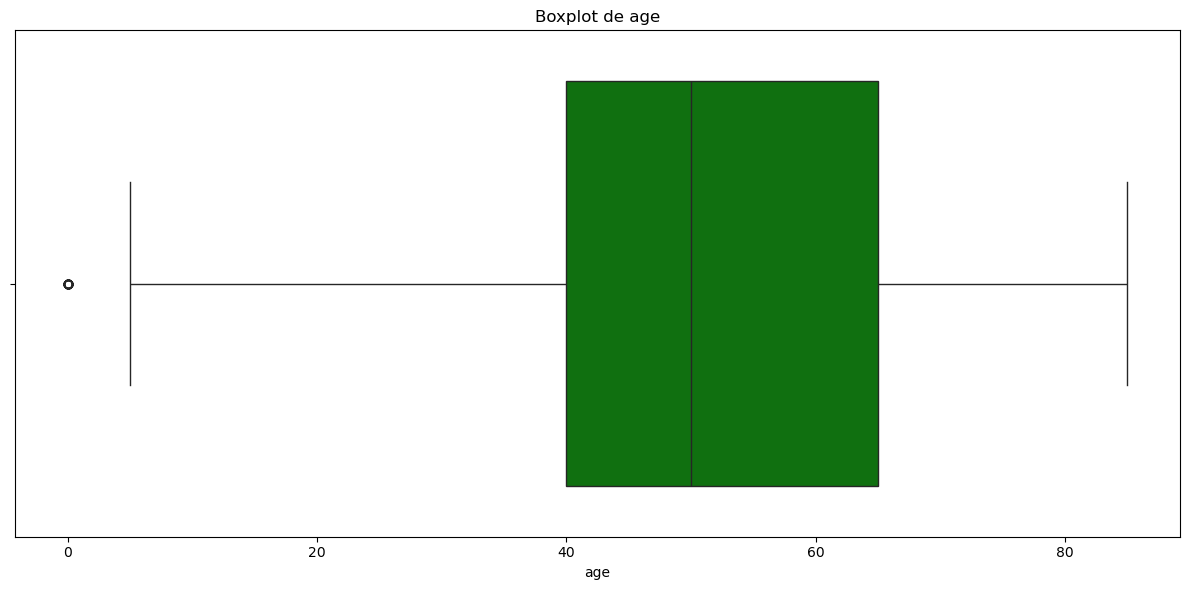

In [17]:
# 2. Boxplots pour détecter les valeurs aberrantes dans les variables numériques
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(x=df[col], color='green')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [31]:
#### Ananlyse centré sur le cas de "BCC" ####

# 1. Filtrer les cas "bcc"
bcc_data = df[df['dx'] == 'bcc'] 
non_bcc_df = df[df['dx'] != 'bcc']
# dx représente les différents diagnostiques

# 2. Proportions des cas "bcc" par rapport aux autres
proportions = df['dx'].value_counts(normalize=True)
print("\nProportions des différentes catégories de 'dx':\n", proportions)


Proportions des différentes catégories de 'dx':
 dx
nv       0.669496
mel      0.111133
bkl      0.109735
bcc      0.051323
akiec    0.032651
vasc     0.014179
df       0.011483
Name: proportion, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_12276\1095611641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='dx', order=df['dx'].value_counts().index, palette='muted')


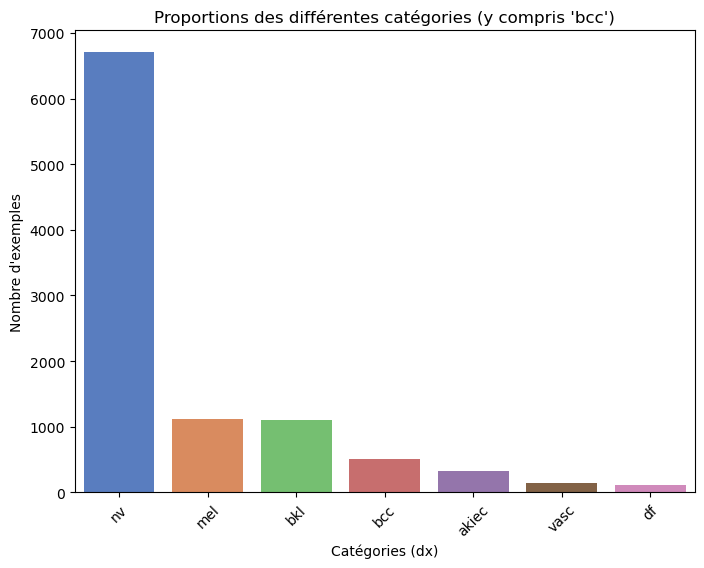

In [24]:
# Visualiser les proportions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='dx', order=df['dx'].value_counts().index, palette='muted')
plt.title("Proportions des différentes catégories (y compris 'bcc')")
plt.xlabel("Catégories (dx)")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=45)
plt.show()

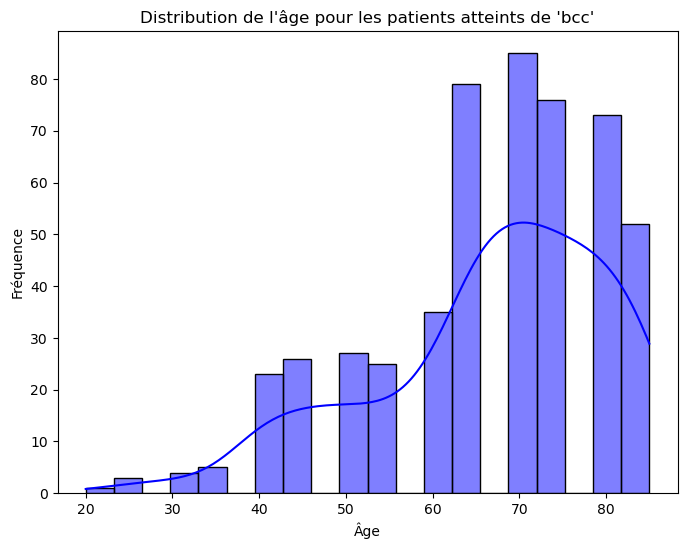

In [25]:
# 3. Distribution des âges pour "bcc"
plt.figure(figsize=(8, 6))
sns.histplot(bcc_data['age'], kde=True, bins=20, color='blue')
plt.title("Distribution de l'âge pour les patients atteints de 'bcc'")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12276\1200386244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dx', y='age', palette='muted', order=df['dx'].value_counts().index)


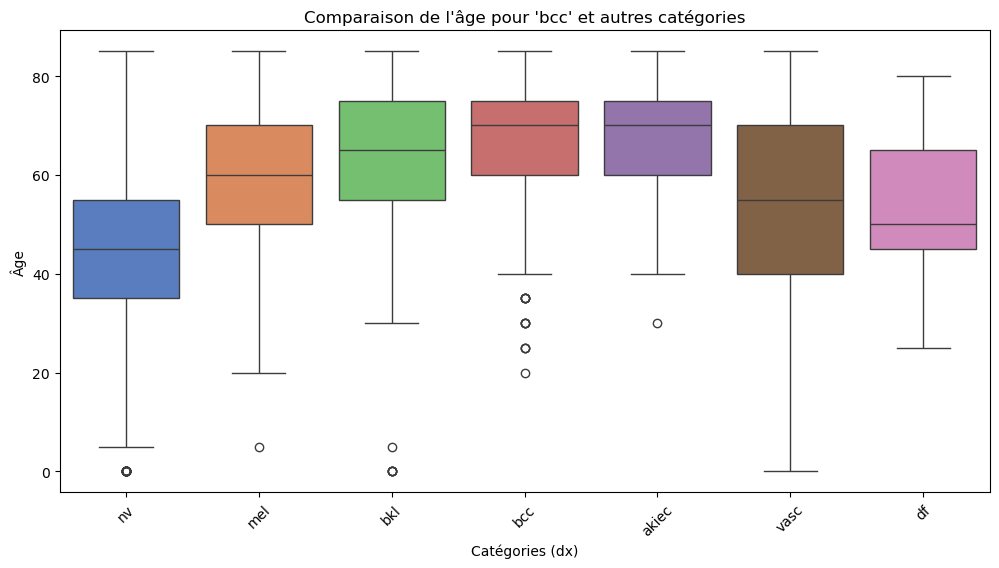

In [26]:
# 4. Comparaison des variables numériques pour "bcc" et autres
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='dx', y='age', palette='muted', order=df['dx'].value_counts().index)
plt.title("Comparaison de l'âge pour 'bcc' et autres catégories")
plt.xlabel("Catégories (dx)")
plt.ylabel("Âge")
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12276\4092261640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bcc_data, x='localization', order=bcc_data['localization'].value_counts().index, palette='viridis')


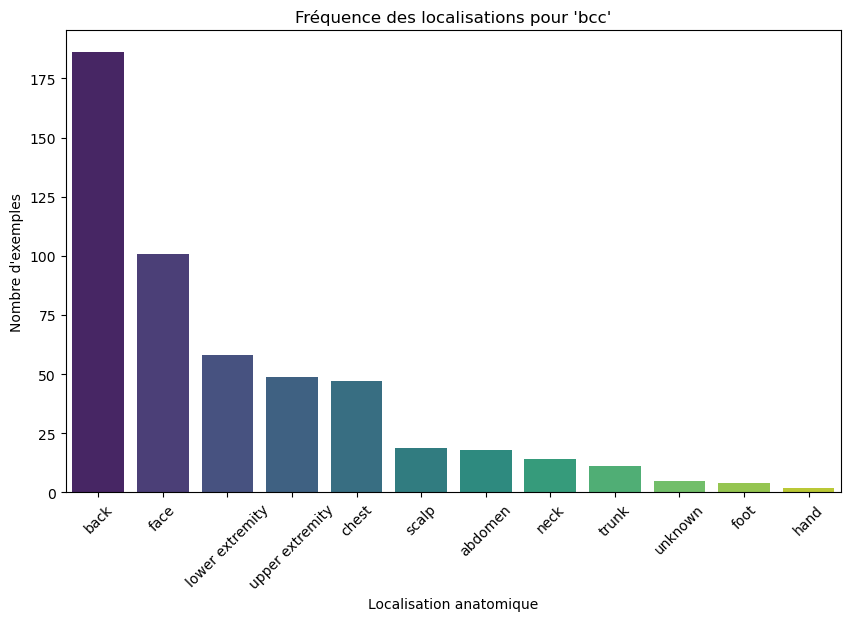

In [27]:
# 5. Distribution des localisations anatomiques pour "bcc"
plt.figure(figsize=(10, 6))
sns.countplot(data=bcc_data, x='localization', order=bcc_data['localization'].value_counts().index, palette='viridis')
plt.title("Fréquence des localisations pour 'bcc'")
plt.xlabel("Localisation anatomique")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=45)
plt.show()

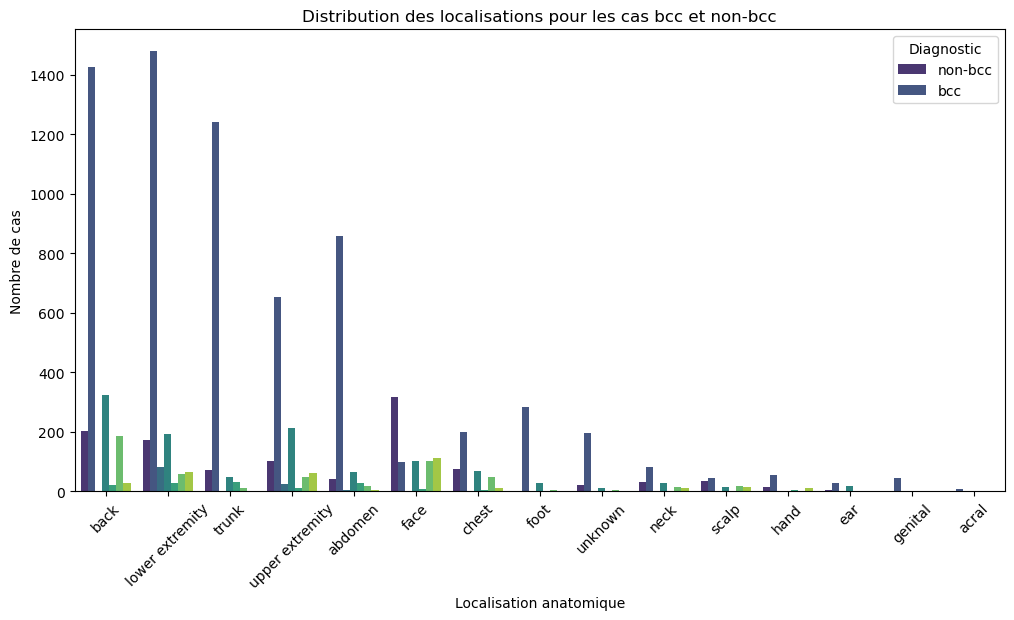

In [34]:
# Relation entre localisation et cas bcc vs non-bcc
plt.figure(figsize=(12, 6))

# Diagramme en barres des localisations pour les cas bcc et non-bcc
sns.countplot(data=df, x='localization', hue='dx', order=df['localization'].value_counts().index, palette='viridis')
plt.title("Distribution des localisations pour les cas bcc et non-bcc")
plt.xlabel("Localisation anatomique")
plt.ylabel("Nombre de cas")
plt.legend(title="Diagnostic", labels=['non-bcc', 'bcc'])
plt.xticks(rotation=45)
plt.show()

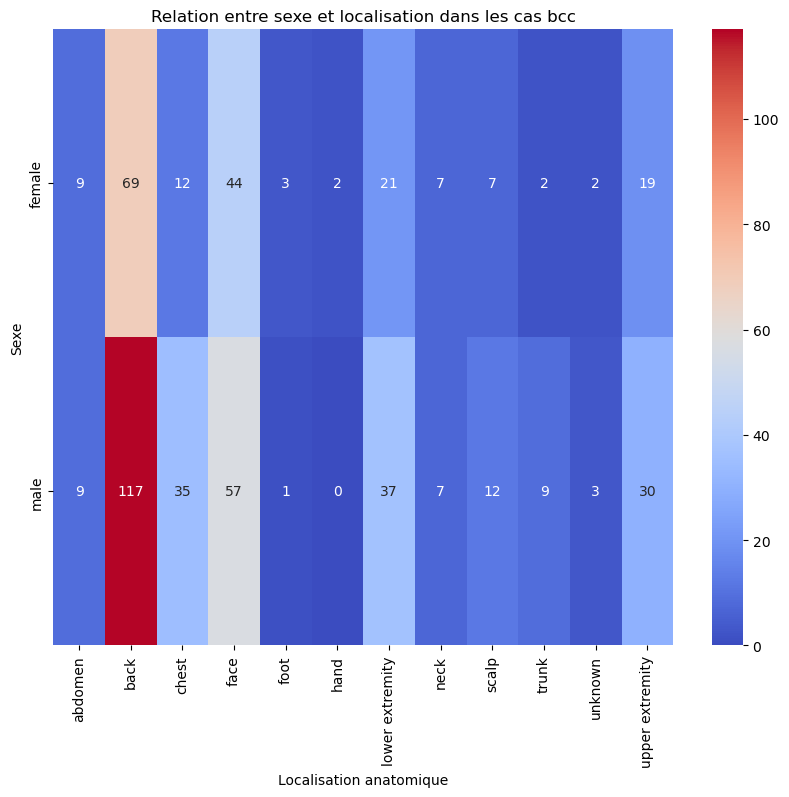

In [37]:
import pandas as pd
# Étape 3 : Corrélations entre sexe, âge et localisation pour les cas bcc
plt.figure(figsize=(10, 8))

# Tableau croisé pour sexe, âge, et localisation dans les cas bcc
bcc_cross = pd.crosstab(bcc_data['sex'], bcc_data['localization'])

# Heatmap des relations entre sexe et localisation dans les cas bcc
sns.heatmap(bcc_cross, annot=True, fmt='d', cmap='coolwarm')
plt.title("Relation entre sexe et localisation dans les cas bcc")
plt.xlabel("Localisation anatomique")
plt.ylabel("Sexe")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12276\4184197334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bcc_data, x='localization', y='age', palette='viridis')


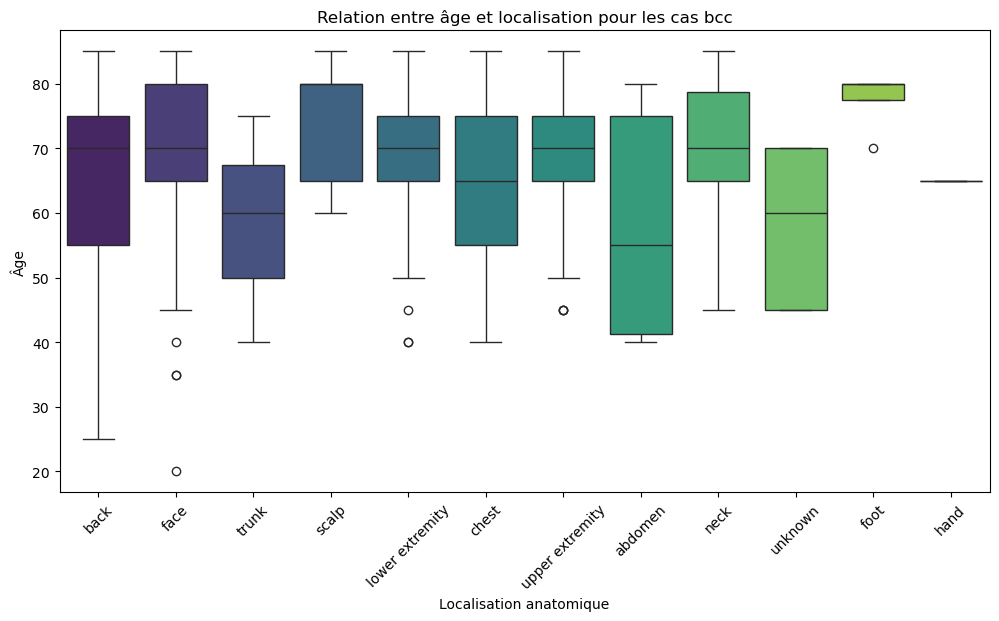

In [39]:
# Relation entre âge et localisation pour les cas bcc (graphiques en boîtes)
plt.figure(figsize=(12, 6))
sns.boxplot(data=bcc_data, x='localization', y='age', palette='viridis')
plt.title("Relation entre âge et localisation pour les cas bcc")
plt.xlabel("Localisation anatomique")
plt.ylabel("Âge")
plt.xticks(rotation=45)
plt.show()

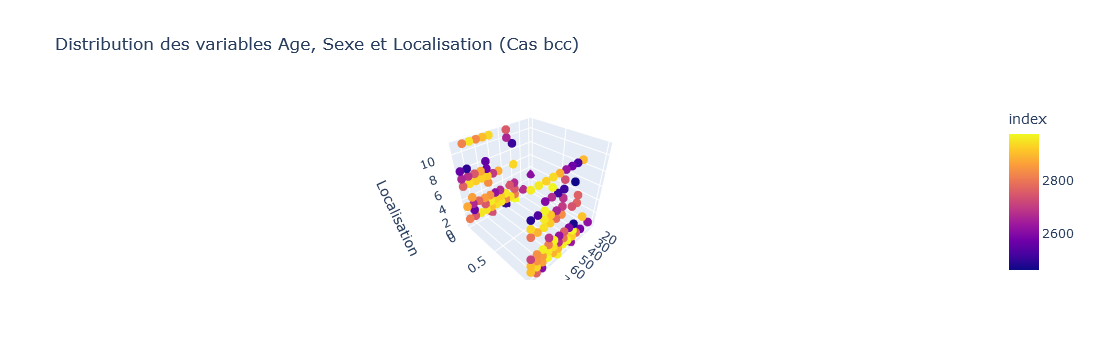

In [59]:
import plotly.express as px
# Créer un DataFrame avec les variables pertinentes pour les cas bcc
bcc_data = df[df['dx'] == 'bcc'][['age', 'sex', 'localization']]

bcc_data['sex'] = bcc_data['sex'].astype('category').cat.codes
bcc_data['localization'] = bcc_data['localization'].astype('category').cat.codes

# Graphique 3D interactif
fig = px.scatter_3d(
    bcc_data,
    x='age',
    y='sex',
    z='localization',
    color=bcc_data.index,  # Colorer par index ou autre catégorie
    labels={'sex': 'Sexe', 'localization': 'Localisation'},
    title="Distribution des variables Age, Sexe et Localisation (Cas bcc)"
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(scene=dict(xaxis_title='Âge', yaxis_title='Sexe', zaxis_title='Localisation'))
fig.show()

In [60]:
from sklearn.model_selection import train_test_split

# Réduire les données à l'âge et à la localisation
bcc_data = df[df['dx'] == 'bcc'][['age', 'localization']]

# Encodage des variables catégoriques
bcc_data['localization'] = bcc_data['localization'].astype('category').cat.codes

# Vérification des données
print(bcc_data.head())

       age  localization
2462  50.0             1
2463  80.0             3
2464  50.0             9
2465  50.0             9
2466  50.0             1


In [61]:
# Ajouter une colonne cible (target)
bcc_data['target'] = 1  # Label pour les cas bcc

# Exemple avec des données non-bcc
non_bcc_data = df[df['dx'] != 'bcc'][['age', 'localization']]
non_bcc_data['localization'] = non_bcc_data['localization'].astype('category').cat.codes
non_bcc_data['target'] = 0  # Label pour les cas non-bcc

# Combiner les deux datasets
combined_data = pd.concat([bcc_data, non_bcc_data], ignore_index=True)

# Remplacer les valeurs NaN éventuelles
combined_data = combined_data.fillna(combined_data.mean())

# Séparer les caractéristiques (X) et la cible (y)
X = combined_data[['age', 'localization']]
y = combined_data['target']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille des données d'entraînement :", X_train.shape)
print("Taille des données de test :", X_test.shape)

Taille des données d'entraînement : (8012, 2)
Taille des données de test : (2003, 2)


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Définir le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluer les performances
print("Exactitude du modèle :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

Exactitude du modèle : 0.9650524213679481

Rapport de classification :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1893
           1       0.74      0.56      0.64       110

    accuracy                           0.97      2003
   macro avg       0.86      0.78      0.81      2003
weighted avg       0.96      0.97      0.96      2003



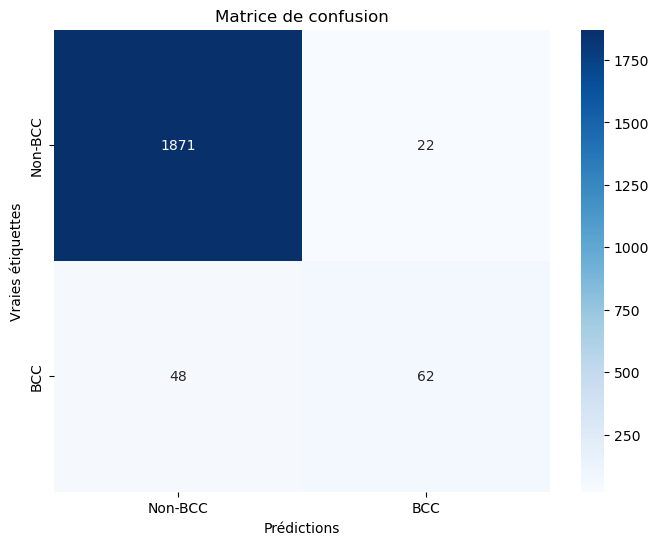

In [63]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-BCC", "BCC"], yticklabels=["Non-BCC", "BCC"])
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vraies étiquettes")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12276\1121956281.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




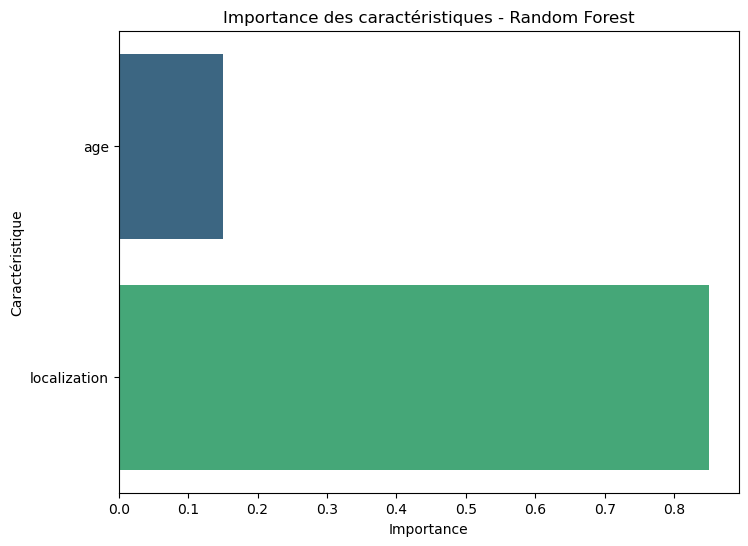

In [64]:
# Importance des variables
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title("Importance des caractéristiques - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Caractéristique")
plt.show()